In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your merged CSV file (replace with your actual file path)
df = pd.read_csv('merged_backtest_data_2008-2024.csv')

# Initialize balance
initial_balance = 1000
df['Equity'] = initial_balance + df['Profit'].cumsum()

# Calculate Profit Factor
# Total Profit is the sum of all positive profits
total_profit = df[df['Profit'] > 0]['Profit'].sum()

# Total Loss is the sum of all negative profits (losses are treated as positive for calculation)
total_loss = abs(df[df['Profit'] < 0]['Profit'].sum())

profit_factor = total_profit / total_loss if total_loss != 0 else np.inf

# Calculate Maximum Drawdown
# Max drawdown is the largest peak-to-trough decline in the equity curve
df['Drawdown'] = df['Equity'] - df['Equity'].cummax()
max_drawdown = df['Drawdown'].min()

# Calculate average win and average loss
positive_trades = df[df['Profit'] > 0]['Profit']
negative_trades = df[df['Profit'] < 0]['Profit']

average_win = positive_trades.mean() if len(positive_trades) > 0 else 0
average_loss = negative_trades.mean() if len(negative_trades) > 0 else 0

# Calculate win rate
total_trades = len(df)
win_rate = len(positive_trades) / total_trades * 100 if total_trades > 0 else 0

# Output results
print(f"Profit Factor: {profit_factor:.2f}")
print(f"Maximum Drawdown: {max_drawdown:.2f}")
print(f"Average Win: {average_win:.2f}")
print(f"Average Loss: {average_loss:.2f}")
print(f"Win Rate: {win_rate:.2f}%")


Profit Factor: 1.10
Maximum Drawdown: -313.17
Average Win: 11.41
Average Loss: -5.01
Win Rate: 32.56%


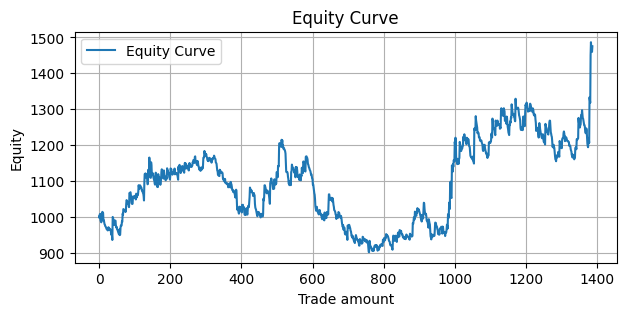

In [3]:
# Plot the equity curve
plt.figure(figsize=(7, 3))
plt.plot(df['Equity'], label='Equity Curve')
plt.title('Equity Curve')
plt.xlabel('Trade amount')
plt.ylabel('Equity')
plt.legend()
plt.grid(True)
plt.show()
